# **Notebook: Linear Regression, Machine Learning for Industrial Engineering**

# Linear Regression

## Importing Libraries

The first thing to do is to install and import all the needed packages and libraries in the python working environment. \\
When working with python, a recommended procedure is to print all the versions of the different libraries to avoid compatibility issues. \\
In this way, the code can be exported and tested by anyone! Without any library dependency-related problems.


In [1]:
#Installing the needed packages
!pip install numpy
!pip install --upgrade tensorflow
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:00:04
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 4.7 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 5.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 4.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 3.9 MB/s eta 0:00:004.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 KB 2.3 MB/s eta 0:00:002.2 MB/s eta 0:00:01
     ━━

Defaulting to user installation because normal site-packages is not writeable


In [3]:
#And importing them
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import matplotlib
import matplotlib.pyplot as plt
print('The matplotlib version which will be used in this notebook is',matplotlib.__version__)
print('The numpy version which will be used in this notebook is',np.__version__)
print('The tensorflow version which will be used in this notebook is',tf.__version__)

The matplotlib version which will be used in this notebook is 3.5.2
The numpy version which will be used in this notebook is 1.22.4
The tensorflow version which will be used in this notebook is 2.10.0


## Generating Dataset

**Linear regression** is a great starting point for the journey of Machine Learning. There are tons of popular modules to solve this problem, but in this notebook, I am going to introduce you to the implementation of linear regression with **TensorFlow** which is namely "an end-to-end open-source platform for machine learning". You can find the relative documentation here: https://www.tensorflow.org/guide.


This is the linear regression formula:
<p align = "center"> $y = Wx + b$

Once we imported the different libraries we will need a dataset. To begin, we start by generating our dataset. We will namely generate $50$ points starting from generating the **$x$** values between $0$ and $1$. The results will be a **numpy** array storing the data: **x_batch**.\
Numpy is  "The fundamental package for scientific computing with python" and you can find all the documentation here: https://numpy.org/doc/stable/.

Similarly, we also want to generate **$y$** such that the points follow the line which has a gradient of $1.5$ adding some form of randomness with the function **np.random.randn()**. To make things interesting, we will also set **y-intercept** of the line (which is namely **$b$**) to $1$.

Thus the real function to be found and from which the dataset points are obtained is:

<p align = "center"> $y = 1.5x + 1$

In [4]:
#let's also fix some seeds for the replicability of the work, in this way, if we run this code 1000 time we will obtain the same results.
np.random.seed(0)
tf.random.set_random_seed(0)

def creating_dataset(n_points, gradient, y_intercept): #def is the keyword in python to implement a function "def function_name(components):"
  x_batch = np.linspace(0, 1, n_points) #generate the different points in the range (0,1)
  y_batch = gradient * x_batch + np.random.randn(n_points)*0.2 + y_intercept #the function np.random.rand() creates an array of the given lenght and populate it with random generated numbers in the range (0,1)
  return x_batch, y_batch

x_batch, y_batch = creating_dataset(50,1.5,1) #defining variables to plot

Now we can plot the generated points and see how they look like on a scatter plot. To construct the plot we are going to employ the python library **Matplotlib** which is "a comprehensive library for creating static, animated, and interactive visualizations in Python". You can find all the relative documentation here: https://matplotlib.org/stable/contents.html.

(0.0, 3.0)

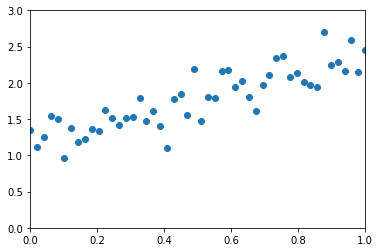

In [5]:
#we will at first start with simple plotting code lines, example after example the complexity will increase, keep attention!
plt.scatter(x_batch,y_batch) # this is for implementing the scatter plot 
plt.xlim(0, 1) #this sets the x-axis limits
plt.ylim(0, 3) #this sets the y-axis limits

#NB we add some random noise

We can see that graphically, the points form a **trend line** as expected, starting from the bottom left to the top right but not cutting through the origin (0, 0).

## Linear Regression Closed Form Solution

We know that **linear regression problems** can be solved with a **Closed-Form Solution**. Namely, this means that there is a method that, without iterative optimization procedures, provides the optimal parameters that we are looking for which in this case are the **$W$** and the **$b$** of the equation:
<p align = "center"> $y = Wx + b$

Let's call $\theta$ the vector containing all the parameters that we need to find, in this case they are **$W$** and **$b$**. We can now rewrite the regression problem as:
<p align = "center"> $y = \theta^TX$

Where **$X$** is the column vector **x_batch** to which we will add a column of $1$ to add the bias term.
The first thing to do is to add this column to the **x_batch** vector, let's do it.


In [21]:
x_batch_twodimensional = np.reshape(x_batch,(np.shape(x_batch)[0],1)) #this is the reshape of x_batch to make it two-dimensional
X = np.append(x_batch_twodimensional, np.ones((x_batch_twodimensional.shape[0],1)), axis=1) #this is the appending of the 1-column for the bias
print('the shape of the matrix X is now',np.shape(X))   

the shape of the matrix X is now (30, 2)


Now the last thing to do is to evaluate the **closed form solution** which is given by the formula
<p align = "center"> $\theta$ $=(X^TX)^{-1}X^Ty$


In [6]:
theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y_batch))
print('So the predicted W is given by the first component of theta which is: ',np.around(theta[0],3))
print('while the predicted b is given by the second component of theta which is: ',np.around(theta[1],3))

So the predicted W is given by the first component of theta which is:  1.218
while the predicted b is given by the second component of theta which is:  1.169


Now we can plot (in purple) the line obtained with the **optimal values** of the parameters computed with the closed-form solution.

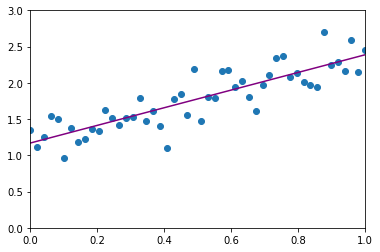

In [7]:
y_pred_theta = np.dot(X,theta) #elementwise multiplication
plt.scatter(x_batch, y_batch) 
plt.plot(x_batch, y_pred_theta, color='purple') #this will plot the line, pay attention between the difference between the plot function and the scatter function
plt.xlim(0, 1)
plt.ylim(0, 3)
plt.savefig('plot.png')

## TensorFlow Implementation 

In this second part of this laboratory, we will construct the **TensorFlow graph** (=method) that helps us computing **$W$**and **$b$**. \
This is done using the **linear_regression()** function.\
In our equation **$y = Wx + b$**, the **$x$** and the **$y$** are nodes represented as TensorFlow's placeholders. The plaecholders in TensorFlow are simply variables that we will assign data to at a later date, this allows us to create our operations and build our computation graph, without needing (in the first moment) the data. In TensorFlow terminology, we will feed data into the graph through these placeholders. \
Note that we are now merely constructing the graph but not running it.

The line with **tf.variable_scope('lreg') as scope:** defines the variable **scope** for our variables in the next line. In short, **variable_scope()** allows the naming of variables in a hierarchical way to avoid name clashes. To elaborate, it is a mechanism in TensorFlow that allows variables to be shared in different parts of the graph without passing references to the variable around. Note that even though we do not reuse variables here, it is a good practice to name them appropriately.

After the variable definition, we will compute the **$y$** prediction which will be terrible before the first iteration and far from the generated **$y$**.

Last but not least there is the formula of the loss function. We want to know how far the predicted **$y$** is away from the real **$y$**. To do this, we need to design a method to calculate the "gap" and this is namely the scope of the loss function. In this example, we employed the *Mean Squared Error (MSE)* loss function as our scoring mechanism. Of course there are tons of other popular loss functions and the choice of which loss to use depends on the problem. In the following, there is the formula for the (empirical) Mean Squared Error:

<p align = "center"> $MSE = \frac{1}{N}\sum^N_{i=1}{(y_{pred}-y)}^2$

In [8]:
def linear_regression():
  x = tf.placeholder(tf.float32, shape=(None, ), name='x')
  y = tf.placeholder(tf.float32, shape=(None, ), name='y')
  # the data type is defined as float32 which is a common data type in placeholder
  # the second argument is the shape of the placeholder set to None as we want it to be determined during training time.
  # the third argument for the placeholder is the name for the placeholder

  with tf.variable_scope('lreg') as scope:
    w = tf.Variable(np.random.normal(), name='W') #differently from a placeholder, W is define as tf.variable: the value will change each time we train the model
    b = tf.Variable(np.random.normal(), name='b') #for now this two variables are going to be initialized random and are sampled by a normal (Gaussian) distribution
		
    y_pred = tf.add(tf.multiply(w, x), b) # the formula for the y prediction, 

    loss = tf.reduce_mean(tf.square(y_pred - y)) # this is the mean square error implementation

  return x, y, y_pred, loss #after constructing the 4 values we need to return them

Previously, we generated the dataset using a **gradient** of $1.5$, so we should expect the trained **$W$** to be close to this number. Selecting the starting number for **$W$** is somewhat important, for example, we could be able to randomly initialize the **$W$** value to $1.5$ and the job would be done. This is also the reason why we fixed the seed in the first part of this notebook. For being sure that your model is working because it is a good model and not only because you were lucky initializing the seed, you should experiment with more than one seed and evaluate the performance averaging the performance over the different initial seeds.\
Regarding this topic, in this case we know that our loss function will always result in one global minimum loss value regardless of the initialization of **$W$** and this is due to the fact that our loss is a convex function (as an exercise you can try to demonstrate it, it's really easy).\
However, this could not be the general case, and for more complex problems there could be local minima, in this case the random initialization of the parameters could be a crucial point for the learning algorithm to avoid being stacked in local minima during the optimization.

Other than **$W$** we also want to train the **bias** **$b$**. In fact, without **$b$**, our line of best fit will always cut through the origin and could not learn the y-intercept that we set to $1$.

## Optimization Procedure

After generating the graph and implementing the function for linear regression, we are now ready to run the program and begin finding our optimal gradient **$W$** and bias **$b$**!

First of all, we need to call the **creating_dataset()** function and **linear_regression()** function to get the variables **x_batch**, **y_batch**, **x**, **y**, **y_pred** and **loss**, and this is the first thing we are going to do in the final **run()** function.

Then we need to define the **optimizer** and ask it to minimize the loss in the graph, there are several optimizer to choose from and we selected for this exercise the classic **Gradient Descent Algorithm** setting the **learning rate** to 0.1. The job of the optimizer is to minimize the loss function. It does so by updating the trainable variables in the direction of the optimal solution every time it runs. Calling the **minimize** function, it computes the gradients and applies them to the variables.

We need to start a session because TensorFlow starts computing the graph only when a session starts. The session object is named as "session" with the command 
**<p align = "center"> with tf.Session() as session:**

After this, we start the session by initialising all the values we ask the variables to hold. Due to TensorFlow functioning, the initialising of the values started after running the line 
**<p align = "center"> session.run(tf.global_variables_initializer())**

Next, we need to come up with **feed_dict** which is essentially an argument for **session.run()**. It is a dictionary with its keys belonging to **tf.Tensor**, **tf.placeholder** or **tf.SparseTensor**.\
In the following line, the **x** and the **y** are the placeholders and **x_batch**, **y_batch** are the values generated, ready to fill up the placeholders during the function **session.run**
**<p align = "center"> feed_dict = {x: x_batch, y: y_batch}**

After the initialization of the variables and the preparing values for placeholders, we now come to the core of this notebook which is to define how many times we want to "train" the weights and bias. The number of times we go through the training data (in this case the **$x$** and the **$y$** which are the generated data we use for training the network) in one full cycle is also known as **epoch** or **training step**.\
One full cycle is also defined as one **feedforward** and one **backpropagation**. During feedforward, we pass in the value of **$x$**, **$W$**, and **$b$** to get the predicted **$y$**. This computes the loss which is namely a scalar number. As the objective of the procedure is to minimize the loss, the optimizer will then perform a backpropagation to adjust the trainable variable so that the next time we perform the feedforward, the loss will be lowered.

With the command line **session.run()** we are ready to run our first epoch with fetches and feed_dict. Over here, **session.run()** evaluates every tensor in fetches and substitutes the values in **feed_dict** for the corresponding input values. A TensorFlow fetch is a single graph element, a list of graph elements or a dictionary whose values are graph elements or list of graph elements.

When the **run()** method is called by the **session** object, what happens is that the code will run through the necessary nodes of the graph to calculate every tensor in the fetches. Since **train_op** refers to the optimizer, calling the method **minimize(loss)**, it will begin to evaluate the loss by calling the MSE function which in turn triggers **y_pred**, **y**, **W**, **x** and **b** to be computed.


epoch: 0 loss: 2.2064247
epoch: 10 loss: 0.16198054
epoch: 20 loss: 0.12913808
epoch: 30 loss: 0.10857045
epoch: 40 loss: 0.092967056
epoch: 50 loss: 0.08112018
epoch: 60 loss: 0.07212544
epoch: 70 loss: 0.06529617
epoch: 80 loss: 0.06011105
epoch: 90 loss: 0.056174245
epoch: 100 loss: 0.053185213
epoch: 110 loss: 0.05091578
epoch: 120 loss: 0.049192738
epoch: 130 loss: 0.047884498
epoch: 140 loss: 0.046891224
Predicting the y_pred_batch for each x_batch element
The first computed point of the line is ( 0.0 ; 1.259 )
The second computed point of the line is ( 0.02 ; 1.28 )
So the computed W is 1.051
And the computed b is 1.259


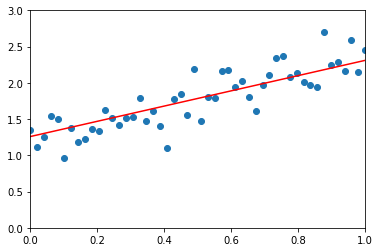

In [9]:
n_epochs = 150  #we set the number of epoch to 150, this is an hyperparameter, more epochs means greater training time but also greater accuracy on the training set
def run(epochs = n_epochs, x_batch=x_batch,y_batch=y_batch): #this function takes 3 argument, if not specified, it will use the predefinite values which are specified when defining the function
  x, y, y_pred, loss = linear_regression()



  optimizer = tf.train.GradientDescentOptimizer(0.1) # 0.1 is the learning rate
  #the learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.
  #for a more detailed explaining of functioning and setting up of the learning rate go to https://www.jeremyjordan.me/nn-learning-rate/
  train_op = optimizer.minimize(loss)

  with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    feed_dict = {x: x_batch, y: y_batch}
		
    for i in range(n_epochs): #we will iterate over the number of epochs
      session.run(train_op, feed_dict) 
      if i%10 == 0: # in this way we will print the result each 10 epochs
        print('epoch:',i, "loss:", loss.eval(feed_dict)) # this line prints out the loss at each epoch, caclulated by the loss.eval() function

    print('Predicting the y_pred_batch for each x_batch element')
    y_pred_batch = session.run(y_pred, {x : x_batch})

  #we plot the chart with both the generate point and the predicted line. Finally we have our pridcted line nicely drawn.
  plt.scatter(x_batch, y_batch)
  plt.plot(x_batch, y_pred_batch, color='red')
  plt.xlim(0, 1)
  plt.ylim(0, 3)
  #plt.savefig('plot.png') in case you want to save the plot

  print('The first computed point of the line is (',np.around(x_batch[0],3),';',np.around(y_pred_batch[0],3),')')
  print('The second computed point of the line is (',np.around(x_batch[1],3),';',np.around(y_pred_batch[1],3),')')
  pred_w = (y_pred_batch[1]- y_pred_batch[0])/(x_batch[1]-x_batch[0])
  pred_b = y_pred_batch[0]
  print('So the computed W is', np.around(pred_w,3))
  print('And the computed b is', np.around(pred_b,3))

  return pred_w, pred_b, y_pred_batch

pred_w, pred_b, y_pred_batch = run() #to run the code running the function run()

So now let's create a plot with the three curves:
- the line predicted with the **closed form solution** (purple)
- the line predicted with the **optimization procedure** (red)
- the **real line** from which we derived the dataset (blue)

(0.0, 3.0)

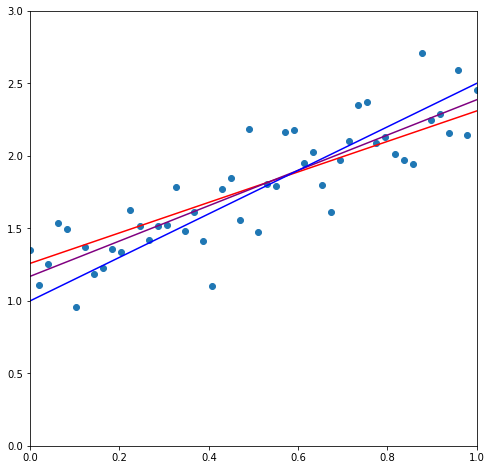

In [10]:
plt.figure(figsize=(8, 8))
plt.scatter(x_batch, y_batch)
plt.plot(x_batch, y_pred_batch, color='red')
plt.plot(x_batch, y_pred_theta, color='purple')
plt.plot(x_batch, (x_batch*1.5+1), color = 'blue')
plt.xlim(0, 1)
plt.ylim(0, 3)

Let's go with a brief recap of the parameters that we obtained with the different methods and let's compare them with the actual values which are:
<p align = "center"> $W = 1.5$
<p align = "center"> $b = 1$

In [11]:
print('The parameters obtained with the closed form solutions are W = ',np.around(theta[0],3), 'and b = ', np.around(theta[1],3))
print('The parameters obtained with the iterative linear regression solution is W = ',np.around(pred_w,3), 'and b = ', np.around(pred_b,3))

The parameters obtained with the closed form solutions are W =  1.218 and b =  1.169
The parameters obtained with the iterative linear regression solution is W =  1.051 and b =  1.259


We can see (also from a graphical point of view) that the obtained predictions of the parameters differ from the actual values of the real parameters. This is given by the fact that at the beginning, when creating the dataset, we applied some **random noise** to the data and for this reason, even if we know that the optimal solution exists and we know how to find it, it can just represent the data as they are, and so the model will represent also the random noise.

## Increasing the Dataset

We worked with 50 samples, what would happen if we had a bigger dataset? We already implemented the functions for everything we need: creating the new dataset and answering this question, so let's do it!

(0.0, 3.0)

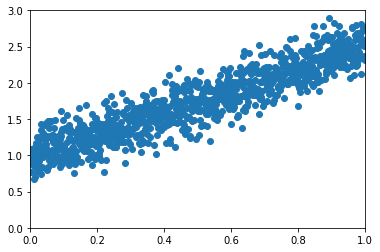

In [12]:
# Let's create a bigger dataset and plot it
x_batch,y_batch = creating_dataset(1000,1.5,1)
plt.scatter(x_batch,y_batch)
plt.xlim(0, 1)
plt.ylim(0, 3)

the predicted W is given by the first component of theta which is:  1.515
while the predicted b is given by the second component of theta which is:  0.983


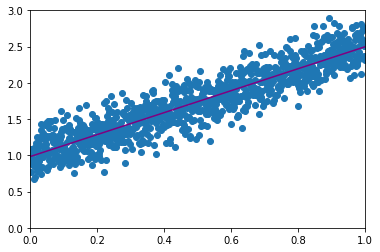

In [13]:
# And let's compute again the closed form solution
x_batch_twodimensional = np.reshape(x_batch,(np.shape(x_batch)[0],1)) #this is the reshape of x_batch to make it two-dimensional
X = np.append(x_batch_twodimensional, np.ones((x_batch_twodimensional.shape[0],1)), axis=1) #this is the appending of the 1-column for the bias
theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y_batch))
print('the predicted W is given by the first component of theta which is: ',np.around(theta[0],3))
print('while the predicted b is given by the second component of theta which is: ',np.around(theta[1],3))
y_pred_theta = np.dot(X,theta)
plt.scatter(x_batch, y_batch) 
plt.plot(x_batch, y_pred_theta, color='purple')
plt.xlim(0, 1)
plt.ylim(0, 3)
plt.savefig('plot.png')

We can see now that the results are tremendously improved and the predicted values for the parameters are actually **very similar** to the real ones. This is because by increasing the cardinality of the dataset, there are more possibilities that the model can **discriminate** the random noise which has 0 average and so, for the law of large numbers (https://www.probabilitycourse.com/chapter7/7_1_1_law_of_large_numbers.php) will be less influent in the procedure of finding the optimal linear regression parameters.



## Exercise 1
- Implement a new dataset of 100 samples following the sequent line:
<p align = "Center"> $y = -2x+3.5$

- Find the optimal parameters using the closed-form solution.
- Increase the dataset size to be as close as possible to the actual solution.
- Plot all the different lines in the same plot, together with the data.
- (\*) Find again the optimal parameters for the linear regression with the optimization procedure in tensorflow. Try to find the best values for the hyperparameters **n_epochs** and **learning_rate**, namely the values that give you the best value for the loss function minimizing the optimization time. Use the time module, an example can be found here https://www.studytonight.com/post/calculate-time-taken-by-a-program-to-execute-in-python.
Notice that in this case we are not using a test set to evaluate the goodness of the model.
- How does the optimization time change varying the number of epochs and the learning rate?
- Plot again all the differently obtained solutions.

(\*) means that you could not be able to do it, but if you try I'm sure you will get some interesting results


the shape of the matrix X is now (100, 2)
So the predicted W is given by the first component of theta which is:  -2.059
while the predicted b is given by the second component of theta which is:  3.542
the shape of the matrix X is now (10000, 2)
So the predicted W is given by the first component of theta which is:  -1.998
while the predicted b is given by the second component of theta which is:  3.495
---Time of execution: 2.2411346435546875e-05 seconds ---


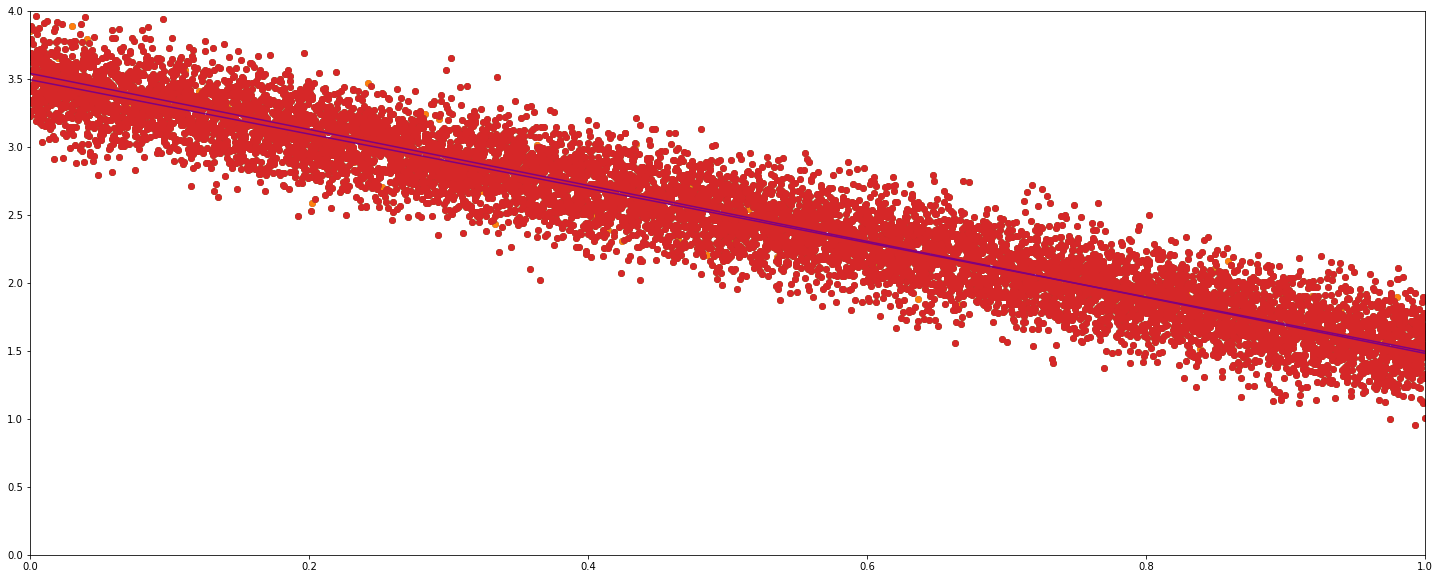

In [57]:
'''EXERCISE 1'''
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


np.random.seed(0)
tf.random.set_random_seed(0)

def creating_dataset(n_points, gradient, y_intercept): 
  x_batch = np.linspace(0, 1, n_points) 
  y_batch = gradient * x_batch + np.random.randn(n_points)*0.2 + y_intercept #the function np.random.rand() creates an array of the given lenght and populate it with random generated numbers in the range (0,1)
  return x_batch, y_batch

x_batch, y_batch = creating_dataset(100,-2,3.5) 


plt.scatter(x_batch,y_batch) # this is for implementing the scatter plot 
plt.xlim(0, 1) 
plt.ylim(0, 5) 

x_batch_twodimensional = np.reshape(x_batch,(np.shape(x_batch)[0],1)) 
X = np.append(x_batch_twodimensional, np.ones((x_batch_twodimensional.shape[0],1)), axis=1) 
print('the shape of the matrix X is now',np.shape(X)) 

theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y_batch))
print('So the predicted W is given by the first component of theta which is: ',np.around(theta[0],3))
print('while the predicted b is given by the second component of theta which is: ',np.around(theta[1],3))

y_pred_theta = np.dot(X,theta) 
plt.scatter(x_batch, y_batch) 
plt.plot(x_batch, y_pred_theta, color='purple') 
plt.xlim(0, 1)
plt.ylim(0, 4)
plt.savefig('plot.png')


#Increase DataSet
x_batch2, y_batch2 = creating_dataset(10000,-2,3.5)

plt.scatter(x_batch2,y_batch2)
x_batch_twodimensional = np.reshape(x_batch2,(np.shape(x_batch2)[0],1)) 
X = np.append(x_batch_twodimensional, np.ones((x_batch_twodimensional.shape[0],1)), axis=1) 
print('the shape of the matrix X is now',np.shape(X)) 

theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y_batch2))
print('So the predicted W is given by the first component of theta which is: ',np.around(theta[0],3))
print('while the predicted b is given by the second component of theta which is: ',np.around(theta[1],3))

y_pred_theta2 = np.dot(X,theta) 
plt.scatter(x_batch2, y_batch2) 
plt.plot(x_batch2, y_pred_theta2, color='purple',) 
plt.xlim(0, 1)
plt.ylim(0,4 )
plt.savefig('plot.png')
plt.rcParams["figure.figsize"] = (25,10)

import time
start_time = time.time()
print("---Time of execution: %s seconds ---" % (time.time() - start_time))


epoch: 0 loss: 0.8677713
epoch: 10 loss: 0.58763105
epoch: 20 loss: 0.45788044
epoch: 30 loss: 0.35907513
epoch: 40 loss: 0.2836508
epoch: 50 loss: 0.22607416
epoch: 60 loss: 0.18212196
epoch: 70 loss: 0.14857024
epoch: 80 loss: 0.12295782
epoch: 90 loss: 0.10340609
epoch: 100 loss: 0.08848092
epoch: 110 loss: 0.07708749
epoch: 120 loss: 0.06839013
epoch: 130 loss: 0.061750825
epoch: 140 loss: 0.056682598
epoch: 150 loss: 0.052813638
epoch: 160 loss: 0.049860206
epoch: 170 loss: 0.04760565
epoch: 180 loss: 0.045884587
epoch: 190 loss: 0.04457078
epoch: 200 loss: 0.04356785
epoch: 210 loss: 0.042802252
epoch: 220 loss: 0.042217817
epoch: 230 loss: 0.04177168
epoch: 240 loss: 0.04143112
epoch: 250 loss: 0.04117113
epoch: 260 loss: 0.040972665
epoch: 270 loss: 0.040821172
epoch: 280 loss: 0.04070553
epoch: 290 loss: 0.040617242
epoch: 300 loss: 0.04054984
epoch: 310 loss: 0.0404984
epoch: 320 loss: 0.040459126
epoch: 330 loss: 0.040429145
epoch: 340 loss: 0.040406264
epoch: 350 loss: 0.04

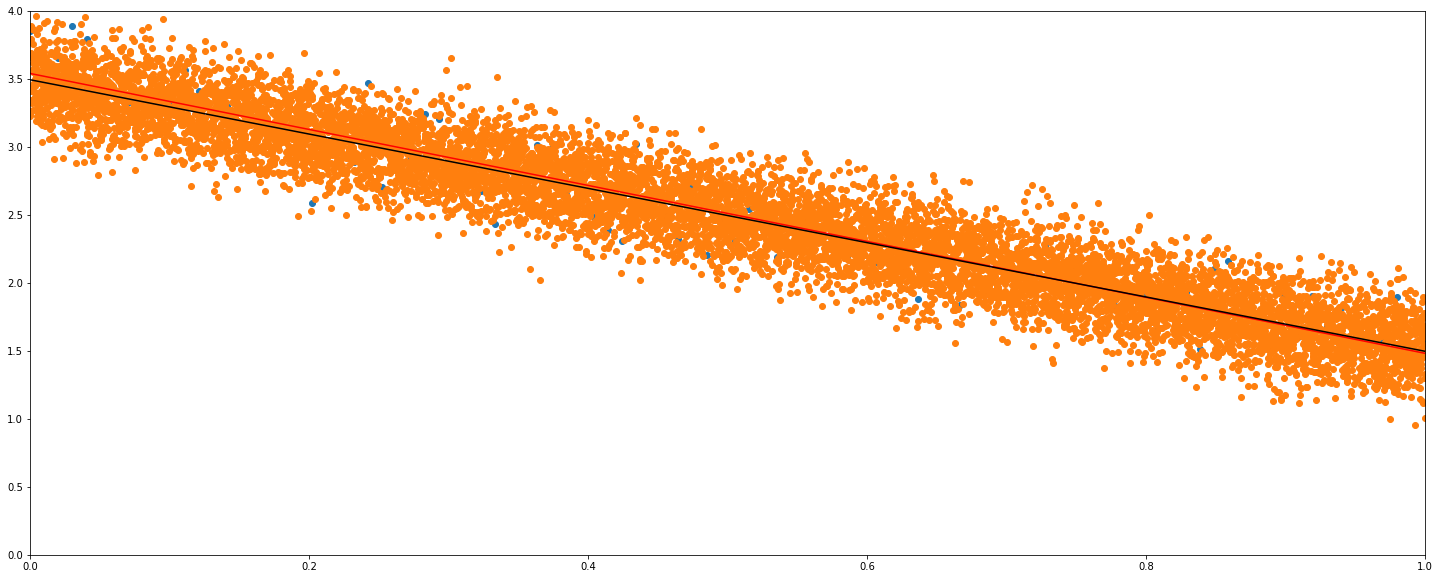

In [56]:
'''EXERCISE 1 - TENSORFLOW'''
def linear_regression():
  x = tf.placeholder(tf.float32, shape=(None, ), name='x')
  y = tf.placeholder(tf.float32, shape=(None, ), name='y')
 
  with tf.variable_scope('lreg') as scope:
    w = tf.Variable(np.random.normal(), name='W') 
    b = tf.Variable(np.random.normal(), name='b') 
		
    y_pred = tf.add(tf.multiply(w, x), b)  

    loss = tf.reduce_mean(tf.square(y_pred - y)) 

  return x, y, y_pred, loss 


#X_BATCH
n_epochs = 1500  
def run(epochs = n_epochs, x_batch=x_batch,y_batch=y_batch): 
  x, y, y_pred, loss = linear_regression()



  optimizer = tf.train.GradientDescentOptimizer(0.1) 
  
  
  train_op = optimizer.minimize(loss)

  with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    feed_dict = {x: x_batch, y: y_batch}
		
    for i in range(n_epochs): 
      session.run(train_op, feed_dict) 
      if i%10 == 0: 
            print('epoch:',i, "loss:", loss.eval(feed_dict)) 

    print('Predicting the y_pred_batch for each x_batch element')
    y_pred_batch = session.run(y_pred, {x : x_batch})

  .
  plt.scatter(x_batch, y_batch)
  plt.plot(x_batch, y_pred_batch, color='red')
  plt.xlim(0, 1)
  plt.ylim(0, 4)
  

  print('The first computed point of the line is (',np.around(x_batch[0],3),';',np.around(y_pred_batch[0],3),')')
  print('The second computed point of the line is (',np.around(x_batch[1],3),';',np.around(y_pred_batch[1],3),')')
  pred_w = (y_pred_batch[1]- y_pred_batch[0])/(x_batch[1]-x_batch[0])
  pred_b = y_pred_batch[0]
  print('So the computed W is', np.around(pred_w,3))
  print('And the computed b is', np.around(pred_b,3))

  return pred_w, pred_b, y_pred_batch

pred_w, pred_b, y_pred_batch = run() 


start_time = time.time()
print("--- BATCH1: %s seconds ---" % (time.time() - start_time))


#BATCH_2
def run(epochs = n_epochs, x_batch2=x_batch2,y_batch2=y_batch2): 
  x2, y2, y_pred2, loss2 = linear_regression()



  optimizer = tf.train.GradientDescentOptimizer(0.1) # 0.1 is the learning rate
  
  train_op = optimizer.minimize(loss2)

  with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    feed_dict = {x2: x_batch2, y2: y_batch2}
		
    for i in range(n_epochs): #we will iterate over the number of epochs
      session.run(train_op, feed_dict) 
      if i%10 == 0: # in this way we will print the result each 10 epochs
        print('epoch:',i, "loss:", loss2.eval(feed_dict)) # this line prints out the loss at each epoch, caclulated by the loss.eval() function

    print('Predicting the y_pred_batch for each x_batch element')
    y_pred_batch2 = session.run(y_pred2, {x2 : x_batch2})

  #we plot the chart with both the generate point and the predicted line. Finally we have our pridcted line nicely drawn.
  plt.scatter(x_batch2, y_batch2)
  plt.plot(x_batch2, y_pred_batch2, color='black')
  plt.xlim(0, 1)
  plt.ylim(0, 4)
  #plt.savefig('plot.png') in case you want to save the plot

  print('The first computed point of the line is (',np.around(x_batch2[0],3),';',np.around(y_pred_batch2[0],3),')')
  print('The second computed point of the line is (',np.around(x_batch2[1],3),';',np.around(y_pred_batch2[1],3),')')
  pred_w2 = (y_pred_batch2[1]- y_pred_batch2[0])/(x_batch2[1]-x_batch2[0])
  pred_b2 = y_pred_batch2[0]
  print('So the computed W is', np.around(pred_w2,3))
  print('And the computed b is', np.around(pred_b2,3))

  return pred_w2, pred_b2, y_pred_batch2

pred_w2, pred_b2, y_pred_batch2 = run() #to run the code running the function run()

start_time = time.time()
print("--- BATCH 2: %s seconds ---" % (time.time() - start_time))

#INCREASING NUMBER OF EPOCH I INCREASE ACCURACY



# Overfitting and Underfitting
The fundamental assumption in Machine Learning and Deep Learning studies is that the underlying samples in the data follow some patterns. If these patterns exist (also if they are unknown and are what we want to find), a poor performance of a Machine Learning algorithm is probably caused by the **Overfitting** or the **Underfitting** of the data.

In this part of the notebook, you will discover the concept of **generalization** in Machine Learning and the problems of overfitting and underfitting that go along with it.

## Dataset creation
Let's create another dataset composed of point following the function:
<p align = "center"> $y = cos(1.5π x)$

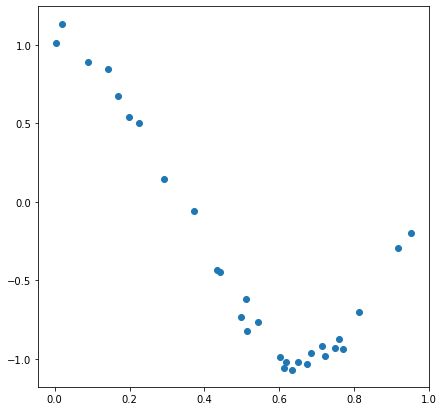

In [14]:
np.random.seed(10) #let's set again the seed for replicability, let's try with another seed
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30 #this is the number of samples to be created

x_batch = np.sort(np.random.rand(n_samples)) # x is taken from a random distribution
y_batch = true_fun(x_batch) + np.random.randn(n_samples) * 0.1 #the y is computed by the true_function() function and also in this case some random noise is added to the y
#0.1 is a scale factor to explain importance of the noise
#let's plot the data and see what we get
plt.figure(figsize=(7, 7))
plt.scatter(x_batch, y_batch)

## Liner Regression closed form solution

What happens if we try to do linear regression with this kind of data? 
Let's see, let's compute the closed-form solution for the linear regression on this dataset and plot the line (in purple) that we obtain. Let's also plot the real curve (in  representing the data to see the difference between the model

The predicted W is given by the first component of theta which is:  -2.304
While the predicted b is given by the second component of theta which is:  0.806


Text(0.5, 1.0, 'Plot')

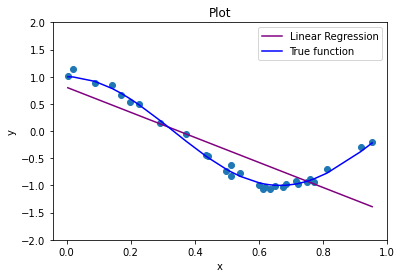

In [15]:
x_batch_twodimensional = np.reshape(x_batch,(np.shape(x_batch)[0],1)) #this is the reshape of x_batch to make it two-dimensional
X = np.append(x_batch_twodimensional, np.ones((x_batch_twodimensional.shape[0],1)), axis=1) #this is the appending of the 1-column for the bias
theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y_batch))
print('The predicted W is given by the first component of theta which is: ',np.around(theta[0],3))
print('While the predicted b is given by the second component of theta which is: ',np.around(theta[1],3))
y_pred_theta = np.dot(X,theta)
#plt.setp(ax, xticks=(), yticks=())
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best") #where to put the legend of the graph
plt.scatter(x_batch, y_batch) #plotting the points 
plt.plot(x_batch, y_pred_theta, color='purple', label='Linear Regression') #plot the line obtained in purple
plt.plot(x_batch, true_fun(x_batch), color ='blue', label="True function") #plot the real function in blue
plt.savefig('plot.png')
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Plot")

It is obvious that in this case, we can't use the linear regression model to represent the data, and that simply is because the data are following a sigmoid function and the linear model it's too simple to represent the data!\
**The linear regression model is not able to fit the data properly**\
More specifically in this case the model it's too simple, even the best line can't represent the function, and so we are talking about **Underfitting** and in this case there is the need for a more complex model.

But wait a minute, we know that for a set of n points, there will be surely a polynomial of grade n-1 able to perfectly fit that points. So let's implement it.

## Polynomial regression

We will do polynomial regression with the employment of another widely used Machine Learning library which is **Scikit-learn**. This library is a little bit less intuitive than tensorflow and the other libraries employed in this notebook. Although this the documentation is extremely helpful and can be found here: https://scikit-learn.org/stable/user_guide.html. 

Let's install it and import the packages we are going to use.

In [16]:
#!pip install sklearn
import sklearn
print('The version of scikit-learn we are using is: ',sklearn.__version__)
#let's import some libraries that we are going to use in the following part of this notebook
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

The version of scikit-learn we are using is:  1.0.2


In statistics, the **polynomial regression** is a form of regression analysis in which the relationship between the independent variable **$x$** and the dependent variable **$y$** is modeled as an $n^{th}$ degree polynomial in **$x$**. So hence depending on what the data looks like, we can do polynomial regression on the data to fit a polynomial equation to it.

The general equation of the polynomial regression is:
<p align = "Center"> $y = \theta_0 + \theta_1x + \theta_2x^2 +...+ \theta_nx^n$

The MSE for the Degree 1 polynomial is:  0.228174
The MSE for the Degree 29 polynomial is:  6205080251.472442


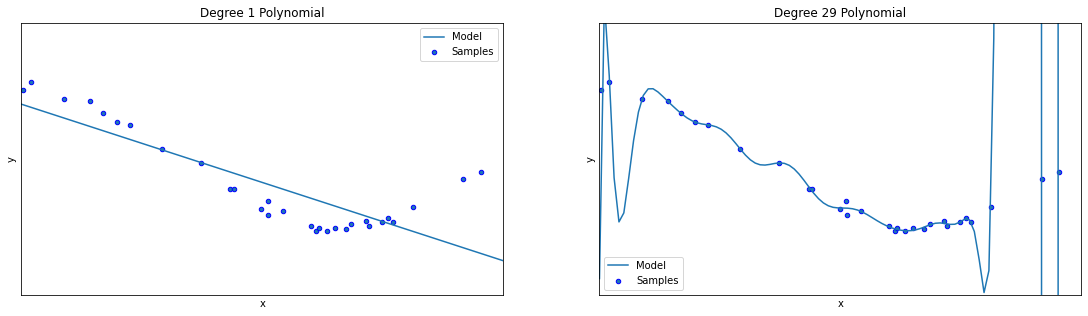

In [17]:
'''This part if the code is a little bit more complex with respect of what we have already seen.
For this reason I think that you will need some time to understand it properly. 
For the lecture time, what you need to know is that we are using the library scikit which does exactly an optimization procedure as 
the one saw for the linear regression but for polynomial regression'''

'''we are looking for the theta_i coeffs'''


np.random.seed(10)
degrees = [1, 29] #we are going to try polinomial regression with different degree polynomial functions 1(line) and 29

x_batch = np.sort(np.random.rand(n_samples))
y_batch = true_fun(x_batch) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(19, 5)) #we are going to create a big figure in which put the different plots
for i in range(len(degrees)): #iterating on different degrees
    ax = plt.subplot(1, len(degrees), i + 1) # we need a subplot for each different degree
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False) #with this line we define which is the model we want to fit and if include the bias
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)]) #we are creating the pipeline, see the documentation for more details
    pipeline.fit(x_batch[:, np.newaxis], y_batch) #we are fitting the model on the samples we have, namely the x and the y created


    X_test = np.linspace(0, 1, 100) #here we are creating the test set to evaluate the model performance on never seen data from the same distribution
    y_true_test = true_fun(X_test)
    y_pred_test =  pipeline.predict(X_test[:, np.newaxis])
    MSE = (np.square(y_true_test - y_pred_test)).mean()
    print('The MSE for the Degree',degrees[i],'polynomial is: ',np.round(MSE,6))
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.scatter(x_batch, y_batch, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {} Polynomial".format(
        degrees[i]))
plt.show()

'''29th degree too complex model'''

Perfect! we found a model that **fit the training data** (x_batch and y_batch) in a perfect way. As you can see from the plot, the curve is able to interpolate all the different points in the training set.

If we did a very good job with this polynomial model, why the MSE error is so high?

To answer this question let's plot the real function from which the data are obtained (which is the function that we are trying to find).

The MSE for the Degree 1 polynomial is:  0.228174
The MSE for the Degree 29 polynomial is:  6205080251.472442


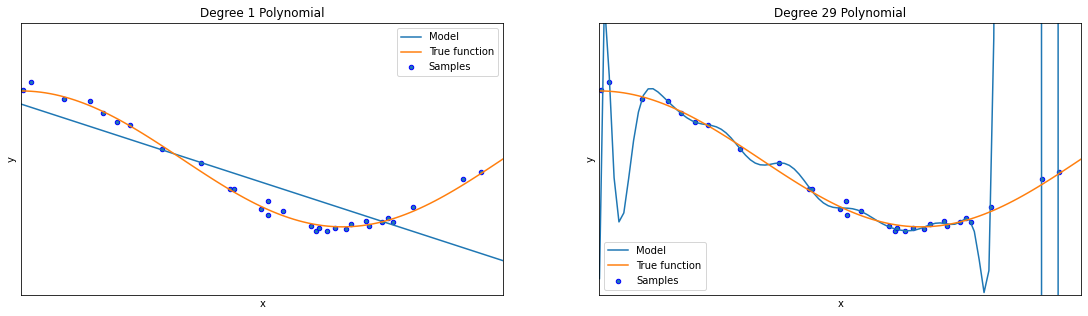

In [18]:
plt.figure(figsize=(19, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(x_batch[:, np.newaxis], y_batch)
    
    X_test = np.linspace(0, 1, 100)
    y_true_test = true_fun(X_test)
    y_pred_test =  pipeline.predict(X_test[:, np.newaxis])
    MSE = (np.square(y_true_test - y_pred_test)).mean()
    print('The MSE for the Degree',degrees[i],'polynomial is: ',np.round(MSE,6))
    plt.plot(X_test, y_pred_test, label="Model")
    plt.plot(X_test, y_true_test, label="True function")
    plt.scatter(x_batch, y_batch, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {} Polynomial".format(
        degrees[i]))
plt.show()


We can see that even if the curve that we obtained with the polynomial regression is well representing the created points, it's not representing the real curve from which the points were obtained. We are giving importance to the data but not to what they represent. This is because we employed a too complex model for the problem, in particular thinking about the fact that we are working only with $30$ samples. This is the **Overfitting**. In this case it is said that the model does not **generalize well** on the test data. This means that it works properly on the training set, fitting the training sample perfectly, but when it comes to never seen data from the same distribution the model is a complete disaster.

## Model Selection
It is the ability of the model developer to choose the proper complexity for the problem he is facing, and this is an open issue in the Machine Learning as well as Deep Learning fields and it can be solved (by now) only by the experience of the model builder.

In this case, probably, an appropriate number for the polynomial degree is $3$ or $4$ so let's try these other two models and confront them with the already seen implementations.

The MSE for the Degree 1 polynomial is:  0.228174
The MSE for the Degree 3 polynomial is:  0.005337
The MSE for the Degree 4 polynomial is:  0.001537
The MSE for the Degree 29 polynomial is:  6205080251.472442


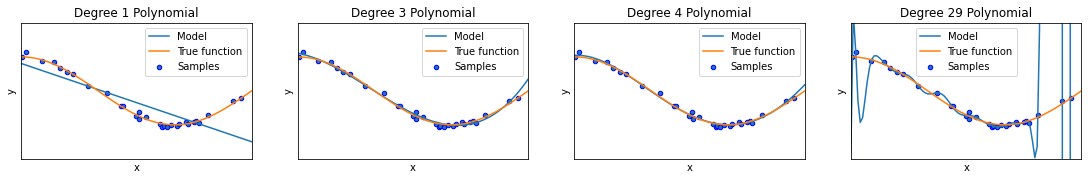

In [19]:
degrees = [1, 3, 4, 29]
plt.figure(figsize=(19, 2.5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(x_batch[:, np.newaxis], y_batch)


    X_test = np.linspace(0, 1, 100)
    y_true_test = true_fun(X_test)
    y_pred_test =  pipeline.predict(X_test[:, np.newaxis])
    MSE = (np.square(y_true_test - y_pred_test)).mean()
    print('The MSE for the Degree',degrees[i],'polynomial is: ',np.round(MSE,6))
    plt.plot(X_test, y_pred_test, label="Model")
    plt.plot(X_test, y_true_test, label="True function")
    plt.scatter(x_batch, y_batch, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {} Polynomial".format(
        degrees[i]))
plt.show()


It is easy to see how our consideration was right and how the degree $3$ and $4$ polynomial can perfectly fit the training data and also follow the curve with a really small value of the loss function.
## Increasing the dataset

But there is also another possibility to improve the model performance on the test data: increasing the size of the dataset as shown for linear regression.
So let's implement this last code experiment.

The MSE for the Degree 1 polynomial is:  0.181195
The MSE for the Degree 3 polynomial is:  0.003131
The MSE for the Degree 4 polynomial is:  0.000226
The MSE for the Degree 29 polynomial is:  0.000222


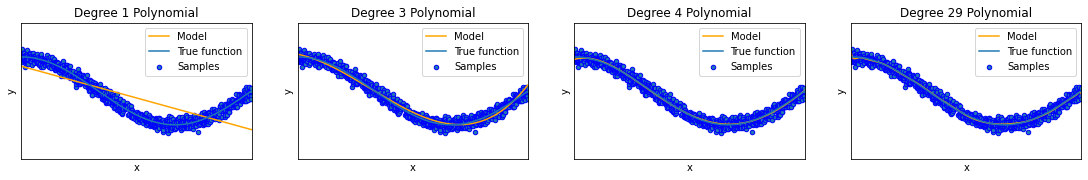

In [20]:
np.random.seed(10)
n_samples = 1000
degrees = [1,3, 4, 29]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(19, 2.5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)


    X_test = np.linspace(0, 1, 10000)
    y_true_test = true_fun(X_test)
    y_pred_test =  pipeline.predict(X_test[:, np.newaxis])
    MSE = (np.square(y_true_test - y_pred_test)).mean()
    print('The MSE for the Degree',degrees[i],'polynomial is: ',np.round(MSE,6))
    plt.plot(X_test, y_pred_test, label="Model", color='orange')
    plt.plot(X_test, y_true_test, label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {} Polynomial".format(
        degrees[i]))

plt.show()


It can be easily seen (zooming) that in this case, with a great number of data samples, the degree 29 polynomial model does not overfit but it's actually reproducing the real curve in a good way. It is actually reproducing the actual curve with a better MSE loss value with respect to the other implemented models, but the increase in the performance is so low that it isn't whort such increase in the number of parameters to find.